In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd

# Загрузка данных через kagglehub
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

# Загрузка train и test данных
train_data = pd.read_csv(f"{path}/train.csv")
test_data = pd.read_csv(f"{path}/test.csv")

In [18]:
# 2. Предобработка
X = train_data.drop("price_range", axis=1).values
y = train_data["price_range"].values


# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# 3. Преобразование в тензоры для PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

In [20]:
# 4. Модель полносвязанной нейронной сети
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Инициализация модели
input_size = X_train.shape[1]
hidden_size = 64
output_size = len(np.unique(y))  # Количество классов

model = MLP(input_size, hidden_size, output_size)

In [21]:
# 5. Обучение модели
criterion = nn.CrossEntropyLoss()  # Для многоклассовой классификации
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Прямой проход
    outputs = model(X_train_tensor)

    # Вычисление ошибки
    loss = criterion(outputs, y_train_tensor)

    # Обратное распространение и шаг оптимизации
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/10000], Loss: 1.3830
Epoch [20/10000], Loss: 1.3684
Epoch [30/10000], Loss: 1.3526
Epoch [40/10000], Loss: 1.3347
Epoch [50/10000], Loss: 1.3145
Epoch [60/10000], Loss: 1.2919
Epoch [70/10000], Loss: 1.2681
Epoch [80/10000], Loss: 1.2438
Epoch [90/10000], Loss: 1.2202
Epoch [100/10000], Loss: 1.1979
Epoch [110/10000], Loss: 1.1774
Epoch [120/10000], Loss: 1.1588
Epoch [130/10000], Loss: 1.1420
Epoch [140/10000], Loss: 1.1267
Epoch [150/10000], Loss: 1.1124
Epoch [160/10000], Loss: 1.0990
Epoch [170/10000], Loss: 1.0860
Epoch [180/10000], Loss: 1.0734
Epoch [190/10000], Loss: 1.0609
Epoch [200/10000], Loss: 1.0485
Epoch [210/10000], Loss: 1.0362
Epoch [220/10000], Loss: 1.0240
Epoch [230/10000], Loss: 1.0121
Epoch [240/10000], Loss: 1.0004
Epoch [250/10000], Loss: 0.9890
Epoch [260/10000], Loss: 0.9779
Epoch [270/10000], Loss: 0.9673
Epoch [280/10000], Loss: 0.9572
Epoch [290/10000], Loss: 0.9476
Epoch [300/10000], Loss: 0.9386
Epoch [310/10000], Loss: 0.9301
Epoch [320/10000]

In [22]:
# 6. Оценка модели
model.eval()
with torch.no_grad():
    outputs = model(X_val_tensor)
    _, predicted = torch.max(outputs, 1)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       105
           1       0.79      0.90      0.84        91
           2       0.87      0.78      0.82        92
           3       0.93      0.94      0.93       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



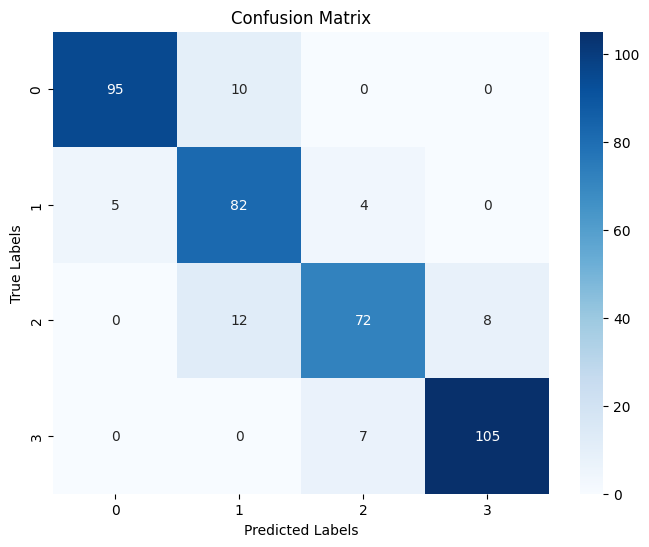

In [23]:
# 7. Метрики
accuracy = accuracy_score(y_val, predicted.numpy())
print(f"Accuracy: {accuracy:.2f}")

# Классификационный отчет
print("Classification Report:")
print(classification_report(y_val, predicted.numpy()))

# Матрица ошибок
cm = confusion_matrix(y_val, predicted.numpy())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()